# Exercice 13) Deep Deterministic Policy Gradients and Proximal Policy Optimization

In this exercise we will investigate two state-of-the-art algorithms: deep deterministic policy gradient (DDPG) and proximal policy optimization (PPO).

We will examine their performance on [Goddard's rocket problem](https://github.com/osannolik/gym-goddard).
This environment comes prepackaged in this notebook's folder, so it can be just imported.

```
First formulated by R. H. Goddard around 1910, this is a classical problem within dynamic optimization and optimal control. The task is simply to find the optimal thrust profile for a vertically ascending rocket in order for it to reach the maximum possible altitude, given that its mass decreases as the fuel is spent and that it is subject to varying drag and gravity.

The state, and the gym's observation space, of the rocket is its vertical position, velocity and mass.

The rocket engine is assumed to be throttled such that the thrust can be continuously controlled between 0 to some maximum limit.
```

![](https://github.com/osannolik/gym-goddard/blob/master/animation.gif)

In [106]:
from rocket_env import GoddardEnv
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1) DDPG

## 2) PPO

The [original paper from 2017](https://arxiv.org/abs/1707.06347) for the PPO came up with an idea to combine A2C (having multiple workers) and TRPO (using a trust region to improve the actor).
The PPO algorithm achieves this by hard clipping gradients in order to ensure that new policies won't be too far away from old ones.

In [140]:
from stable_baselines3 import PPO, DDPG, A2C
from stable_baselines3.common.env_util import make_vec_env
import torch

policy_kwargs = dict(activation_fn=torch.nn.Tanh, net_arch=dict(pi=[8] * 2, qf=[8] * 2))

n_envs = 4
#env = make_vec_env(GoddardEnv, n_envs=n_envs, seed=0)
env = GoddardEnv()
model = PPO('MlpPolicy', env, n_steps=1280, n_epochs=100,  verbose=0, device='cpu', learning_rate=1e-3, batch_size=64)
model = model.learn(total_timesteps=int(1e4))

In [159]:
n_episodes = 5
#model = PPO('MlpPolicy', env, n_steps=1280, n_epochs=100,  verbose=0, device='cpu', learning_rate=1e-3, batch_size=64)
max_steps_per_episode = 500
tst_logs = {'rewards': []}
for ep in range(n_episodes):
    obs = env.reset()
    done = np.zeros(n_envs, dtype=np.bool)
    cum_rew = 0
    k = 0
    while not np.all(done) and k < max_steps_per_episode:
        action, _state = model.predict(obs, deterministic=True) # env.action_space.sample()#
        obs, reward, done, info = env.step(action)
        env.render()
        cum_rew += reward
        k += 1

    tst_logs['rewards'].append(cum_rew)
rewards = np.array(tst_logs['rewards']).ravel()

KeyboardInterrupt: 

In [156]:
env.close()

In [147]:
rewards

array([0.01020396, 0.01012596, 0.01002829, 0.01072063, 0.01090478])

Mean reward ± std.dev: 0.010397 ± 0.00034906948041522716


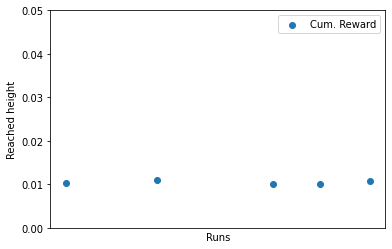

In [148]:
fig = plt.figure()

plt.scatter(np.random.randn(rewards.size), rewards, label='Cum. Reward')
plt.xlabel('Runs')
plt.ylabel('Reached height')
plt.ylim(0, 0.05)
plt.xticks([])
plt.title('')
plt.legend()
print(f'Mean reward ± std.dev: {rewards.mean():.6f} ± {rewards.std()}')